# Implementing a simple two layers neural network
In this exercise we will develop a two neural network with fully-connected layers to perform classification, and test it out on the MNIST dataset.


In [1]:
"""
-----------------------------------------------------------------------------
A simple two layers neural network for handwritten digit classification (MNIST)
-----------------------------------------------------------------------------
AUTHOR: Soumitra Samanta (soumitra.samanta@gm.rkmvu.ac.in)
-----------------------------------------------------------------------------
"""

import gzip
import numpy as np
import matplotlib.pyplot as plt
import copy

from first_nn_sol import *

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


# Read MNIST data:
You can download the data from [here](https://yann.lecun.com/exdb/mnist/). There are many [way](https://stackoverflow.com/questions/40427435/extract-images-from-idx3-ubyte-file-or-gzip-via-python) you can read the MNIST data. Here is a [way](https://stackoverflow.com/a/62781370) to read all the information.

In [2]:
def read_images(filename):
    """Read MNIST images"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8).reshape((image_count, row_count, column_count))
        
    return images

def read_labels(filename):
    """Read MNIST labels"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        
    return labels


dataset_path = '../../data/mnist/'

train_image_filename = ''.join([dataset_path, 'train-images-idx3-ubyte.gz'])
train_label_filename = ''.join([dataset_path, 'train-labels-idx1-ubyte.gz'])

test_image_filename = ''.join([dataset_path, 't10k-images-idx3-ubyte.gz'])
test_label_filename = ''.join([dataset_path, 't10k-labels-idx1-ubyte.gz'])

train_images = read_images(train_image_filename)
train_labels = read_labels(train_label_filename)

print('Train data (X) size: {}, and labels (Y) size: {}' .format(train_images.shape, train_labels.shape))

test_images = read_images(test_image_filename)
test_labels = read_labels(test_label_filename)

print('Test data (X) size: {}, and labels (Y) size: {}' .format(test_images.shape, test_labels.shape))



rand_ids = np.random.choice(train_images.shape[0])
plt.imshow(train_images[rand_ids, :, :], cmap='gray')
plt.title('class-'+str(train_labels[rand_ids]))
plt.show()



FileNotFoundError: [Errno 2] No such file or directory: '../../data/mnist/train-images-idx3-ubyte.gz'

# TODO: Create a validation data from training data (10%) and transform the data in $\mathbf{R}^d$.

In [ ]:
val_data_ration = 0.1
class_ids = list(set(train_labels))
val_ids = []
for cl in class_ids:
    temp_val_index = np.where(train_labels==cl)
    val_ids.extend(list(np.random.permutation(temp_val_index[0])[:round(temp_val_index[0].shape[0]*val_data_ration)]))
# print(val_ids)     
val_images = train_images[val_ids, :, :]  
val_labels = train_labels[val_ids]  
print('Val data (X) size: {}, and labels (Y) size: {}' .format(val_images.shape, val_labels.shape))

train_ids = [i for i in range(train_labels.shape[0]) if i not in val_labels]
revised_train_images = train_images[train_ids, :, :]  
revised_train_labels = train_labels[train_ids]  
 
X_train = revised_train_images.reshape(revised_train_images.shape[0], -1)
Y_train = revised_train_labels.reshape(-1)
X_val = val_images.reshape(val_images.shape[0], -1)
Y_val = val_labels.reshape(-1)
X_test = test_images.reshape(test_images.shape[0], -1)
Y_test = test_labels.reshape(-1)

print('After reshape\n')
print('Train data (X) size: {}, and labels (Y) size: {}' .format(X_train.shape, Y_train.shape))
print('Val data (X) size: {}, and labels (Y) size: {}' .format(X_val.shape, Y_val.shape))
print('Test data (X) size: {}, and labels (Y) size: {}' .format(X_test.shape, Y_test.shape))



                        
                        

Val data (X) size: (5999, 28, 28), and labels (Y) size: (5999,)
After reshape

Train data (X) size: (59990, 784), and labels (Y) size: (59990,)
Val data (X) size: (5999, 784), and labels (Y) size: (5999,)
Test data (X) size: (10000, 784), and labels (Y) size: (10000,)


# Train a network
To train our network we will use Stochastic Gradient Decent (SGD).

In [ ]:
data_dimension = X_train.shape[1]
num_hidden_nodes = 50
num_classes = 10
net = FirstNN(data_dimension, num_hidden_nodes, num_classes)

# Train the network
stats = net.train(X_train, Y_train, X_val, Y_val, 
                  num_iters=10000,
                  num_epoch=30,
                  batch_size=200, 
                  learning_rate=1e-2, 
                  verbose=True
                 )





(100, 784) (100, 10)
2.3025392062699
Training epoch 1/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 1.243258: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 350.51it/s]


epoch: 1 / (30), loss: 1.713449, train acc: 83.66, val acc: 83.73
Training epoch 2/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.864527: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 376.97it/s]


epoch: 2 / (30), loss: 1.029732, train acc: 88.75, val acc: 88.83
Training epoch 3/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.698235: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 387.98it/s]


epoch: 3 / (30), loss: 0.753909, train acc: 89.96, val acc: 90.15
Training epoch 4/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.522376: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 379.91it/s]


epoch: 4 / (30), loss: 0.608527, train acc: 90.24, val acc: 90.02
Training epoch 5/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.544300: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 382.78it/s]


epoch: 5 / (30), loss: 0.520102, train acc: 91.14, val acc: 91.28
Training epoch 6/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.416428: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 341.91it/s]


epoch: 6 / (30), loss: 0.460308, train acc: 91.79, val acc: 91.98
Training epoch 7/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.357141: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 369.71it/s]


epoch: 7 / (30), loss: 0.415176, train acc: 91.91, val acc: 92.02
Training epoch 8/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.371567: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 404.73it/s]


epoch: 8 / (30), loss: 0.382191, train acc: 92.03, val acc: 91.82
Training epoch 9/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.337771: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 381.55it/s]


epoch: 9 / (30), loss: 0.356789, train acc: 92.57, val acc: 92.57
Training epoch 10/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.343080: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 376.55it/s]


epoch: 10 / (30), loss: 0.336786, train acc: 92.81, val acc: 92.67
Training epoch 11/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.316275: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:01<00:00, 273.33it/s]


epoch: 11 / (30), loss: 0.318232, train acc: 92.91, val acc: 92.87
Training epoch 12/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.289285: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 331.20it/s]


epoch: 12 / (30), loss: 0.303870, train acc: 93.15, val acc: 93.22
Training epoch 13/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.277645: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 373.21it/s]


epoch: 13 / (30), loss: 0.291125, train acc: 93.33, val acc: 93.37
Training epoch 14/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.367683: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 381.10it/s]


epoch: 14 / (30), loss: 0.281033, train acc: 93.64, val acc: 93.53
Training epoch 15/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.296717: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 405.85it/s]


epoch: 15 / (30), loss: 0.271826, train acc: 93.66, val acc: 93.80
Training epoch 16/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.273877: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 422.18it/s]


epoch: 16 / (30), loss: 0.263040, train acc: 93.97, val acc: 94.05
Training epoch 17/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.184469: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 415.83it/s]


epoch: 17 / (30), loss: 0.255203, train acc: 94.20, val acc: 94.23
Training epoch 18/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.158759: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 416.99it/s]


epoch: 18 / (30), loss: 0.247110, train acc: 93.87, val acc: 93.73
Training epoch 19/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.266427: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 400.71it/s]


epoch: 19 / (30), loss: 0.242528, train acc: 94.21, val acc: 94.38
Training epoch 20/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.260855: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 403.33it/s]


epoch: 20 / (30), loss: 0.236910, train acc: 94.09, val acc: 93.78
Training epoch 21/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.229202: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 415.20it/s]


epoch: 21 / (30), loss: 0.231205, train acc: 94.33, val acc: 94.22
Training epoch 22/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.189448: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 437.54it/s]


epoch: 22 / (30), loss: 0.227124, train acc: 94.28, val acc: 94.23
Training epoch 23/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.266196: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 437.98it/s]


epoch: 23 / (30), loss: 0.223497, train acc: 94.68, val acc: 94.72
Training epoch 24/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.160830: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 425.33it/s]


epoch: 24 / (30), loss: 0.220427, train acc: 94.55, val acc: 94.60
Training epoch 25/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.196633: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 437.48it/s]


epoch: 25 / (30), loss: 0.217674, train acc: 94.32, val acc: 94.18
Training epoch 26/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.204494: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 433.46it/s]


epoch: 26 / (30), loss: 0.211051, train acc: 94.73, val acc: 95.17
Training epoch 27/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.156413: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 432.83it/s]


epoch: 27 / (30), loss: 0.211025, train acc: 94.61, val acc: 94.65
Training epoch 28/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.218833: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 427.52it/s]


epoch: 28 / (30), loss: 0.204604, train acc: 94.74, val acc: 94.87
Training epoch 29/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.253815: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 424.78it/s]


epoch: 29 / (30), loss: 0.201183, train acc: 94.87, val acc: 95.05
Training epoch 30/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.139564: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 418.35it/s]


epoch: 30 / (30), loss: 0.201756, train acc: 94.90, val acc: 95.13


In [ ]:
# Predict on the train set
Y_train_pred = net.predict(X_train, best_param=True)
train_acc = 100*(Y_train_pred == Y_train).mean()
print('Train accuracy: {:.2f}' .format(train_acc))

# Predict on the validation set
Y_val_pred = net.predict(X_val, best_param=True)
val_acc = 100*(Y_val_pred == Y_val).mean()
print('Validation accuracy: {:.2f}' .format(val_acc))

# Predict on the test set
Y_test_pred = net.predict(X_test, best_param=True)
test_acc = 100*(Y_test_pred == Y_test).mean()
print('Test accuracy: {:.2f}' .format(test_acc))

Train accuracy: 94.97
Validation accuracy: 94.83
Test accuracy: 94.04


# Plot the loss.

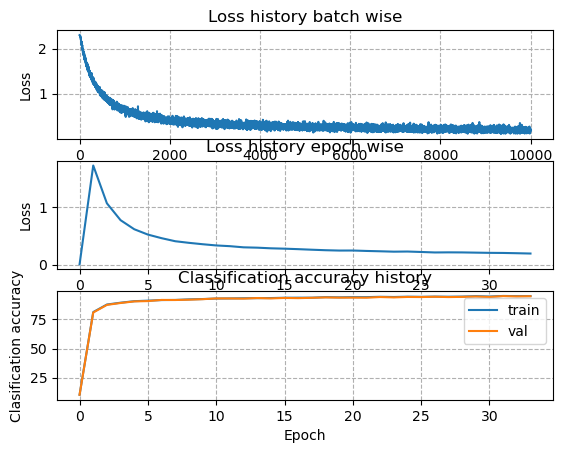

In [ ]:
# Plot the loss function and train / validation accuracies
plt.subplot(3, 1, 1)
plt.plot(stats['loss_history_batch'])
plt.title('Loss history batch wise')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(linestyle='--')

plt.subplot(3, 1, 2)
plt.plot(stats['loss_history_epoch'])
plt.title('Loss history epoch wise')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(linestyle='--')

plt.subplot(3, 1, 3)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.grid(linestyle='--')
plt.legend()
plt.show()

# TODO: Tune your hyperparameters:
    - Learning rate:
    - Number of nodes in hidden layer:


In [ ]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#################################################################################
results = {}
best_val = 0
best_net = None
learning_rates = [1e-3, 5e-3, 7e-3, 1e-2, 5e-2, 1e-1]
num_hidden_nodes = [30, 50, 60, 70, 100]
num_classes = 10
num_iters = 5000
num_epoch = 30
batch_size = 256
data_dimension = X_train.shape[1]

for nhn in num_hidden_nodes:
    for lr in learning_rates:
        
        net = FirstNN(data_dimension, nhn, num_classes)

        # Train the network
        stats = net.train(X_train, Y_train, X_val, Y_val, 
                          num_iters=num_iters,
                          num_epoch=num_epoch,
                          batch_size=batch_size, 
                          learning_rate=lr, 
                          verbose=False
                         )
            
        # Predict on the train set
        Y_train_pred = net.predict(X_train, best_param=True)
        train_acc = 100*(Y_train_pred == Y_train).mean()

        # Predict on the validation set
        Y_val_pred = net.predict(X_val, best_param=True)
        val_acc = 100*(Y_val_pred == Y_val).mean()

        results[(nhn, lr)] = (train_acc, val_acc)
        print('#hdnn: {}, lr: {} train accuracy: {:.2f} val accuracy: {:.2f}' .format(nhn, lr, train_acc, val_acc))
        if best_val < val_acc:
            best_val = val_acc
            best_net = copy.deepcopy(net)

# Print best results.
print('Best validation accuracy achieved during cross-validation: {:.2f} for #hdnn: {}, lr: {}' .format(best_val, best_net.best_params['W1'].shape[1], best_net.learning_rate))
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

#hdnn: 30, lr: 0.001 train accuracy: 82.04 val accuracy: 81.95
#hdnn: 30, lr: 0.005 train accuracy: 92.70 val accuracy: 93.17
#hdnn: 30, lr: 0.007 train accuracy: 92.49 val accuracy: 93.07
#hdnn: 30, lr: 0.01 train accuracy: 92.84 val accuracy: 93.63
#hdnn: 30, lr: 0.05 train accuracy: 92.19 val accuracy: 92.53
#hdnn: 30, lr: 0.1 train accuracy: 90.41 val accuracy: 90.85
#hdnn: 50, lr: 0.001 train accuracy: 91.53 val accuracy: 91.63
#hdnn: 50, lr: 0.005 train accuracy: 94.15 val accuracy: 94.47
#hdnn: 50, lr: 0.007 train accuracy: 94.73 val accuracy: 94.97
#hdnn: 50, lr: 0.01 train accuracy: 94.63 val accuracy: 94.97
#hdnn: 50, lr: 0.05 train accuracy: 94.30 val accuracy: 94.67
#hdnn: 50, lr: 0.1 train accuracy: 91.88 val accuracy: 92.53
#hdnn: 60, lr: 0.001 train accuracy: 91.64 val accuracy: 91.82
#hdnn: 60, lr: 0.005 train accuracy: 94.77 val accuracy: 95.32
#hdnn: 60, lr: 0.007 train accuracy: 95.23 val accuracy: 95.57
#hdnn: 60, lr: 0.01 train accuracy: 95.02 val accuracy: 95.50
#

# Test on best model

In [ ]:
# Predict on the train set
Y_train_pred = best_net.predict(X_train, best_param=True)
train_acc = 100*(Y_train_pred == Y_train).mean()
print('Train accuracy: {:.2f}' .format(train_acc))

# Predict on the validation set
Y_val_pred = best_net.predict(X_val, best_param=True)
val_acc = 100*(Y_val_pred == Y_val).mean()
print('Validation accuracy: {:.2f}' .format(val_acc))

# Predict on the test set
Y_test_pred = best_net.predict(X_test, best_param=True)
test_acc = 100*(Y_test_pred == Y_test).mean()
print('Test accuracy: {:.2f}' .format(test_acc))

Train accuracy: 96.39
Validation accuracy: 96.78
Test accuracy: 94.57


## TODO: Play with different initialization

In [ ]:
data_dimension = X_train.shape[1]
num_classes = 10

# Parameters
num_hidden_nodes = 50#best_net.best_params['W1'].shape[1]
learnin_rate = 1e-2# best_net.learning_rate
num_epoch =  30
batch_size = 200

param_init = 'small_std'# 'Xavier'#'ninn_std'

net = FirstNN(data_dimension, num_hidden_nodes, num_classes, param_init=param_init)

# Train the network
stats = net.train(X_train, Y_train, X_val, Y_val, 
                  num_iters=10000,
                  num_epoch=num_epoch,
                  batch_size=batch_size, 
                  learning_rate=learnin_rate, 
                  verbose=True
                 )


Training epoch 1/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 1.265766: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 349.62it/s]


epoch: 1 / (30), loss: 1.750211, train acc: 76.53, val acc: 76.10
Training epoch 2/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 1.006954: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 388.74it/s]


epoch: 2 / (30), loss: 1.109737, train acc: 87.24, val acc: 87.13
Training epoch 3/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.783920: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 382.08it/s]


epoch: 3 / (30), loss: 0.829675, train acc: 89.45, val acc: 89.78
Training epoch 4/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.570765: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 397.01it/s]


epoch: 4 / (30), loss: 0.669739, train acc: 90.54, val acc: 90.58
Training epoch 5/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.479405: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 412.15it/s]


epoch: 5 / (30), loss: 0.567694, train acc: 91.38, val acc: 91.60
Training epoch 6/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.465670: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 404.46it/s]


epoch: 6 / (30), loss: 0.499323, train acc: 91.49, val acc: 91.53
Training epoch 7/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.373547: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 397.83it/s]


epoch: 7 / (30), loss: 0.448870, train acc: 91.86, val acc: 92.03
Training epoch 8/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.383551: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 398.93it/s]


epoch: 8 / (30), loss: 0.411603, train acc: 92.22, val acc: 92.30
Training epoch 9/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.385207: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 386.19it/s]


epoch: 9 / (30), loss: 0.380969, train acc: 92.39, val acc: 92.67
Training epoch 10/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.317383: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 388.72it/s]


epoch: 10 / (30), loss: 0.357038, train acc: 92.74, val acc: 92.87
Training epoch 11/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.344465: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 379.76it/s]


epoch: 11 / (30), loss: 0.337777, train acc: 93.00, val acc: 93.12
Training epoch 12/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.369080: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 379.82it/s]


epoch: 12 / (30), loss: 0.321932, train acc: 93.08, val acc: 93.45
Training epoch 13/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.315385: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 373.04it/s]


epoch: 13 / (30), loss: 0.308387, train acc: 93.39, val acc: 93.70
Training epoch 14/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.234162: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 363.72it/s]


epoch: 14 / (30), loss: 0.292965, train acc: 93.52, val acc: 93.53
Training epoch 15/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.332161: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 374.64it/s]


epoch: 15 / (30), loss: 0.285227, train acc: 93.54, val acc: 93.87
Training epoch 16/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.326372: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 390.56it/s]


epoch: 16 / (30), loss: 0.273893, train acc: 93.87, val acc: 93.93
Training epoch 17/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.390515: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 397.98it/s]


epoch: 17 / (30), loss: 0.267052, train acc: 93.80, val acc: 93.97
Training epoch 18/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.245600: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 384.42it/s]


epoch: 18 / (30), loss: 0.258421, train acc: 94.15, val acc: 94.32
Training epoch 19/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.284543: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 398.29it/s]


epoch: 19 / (30), loss: 0.251196, train acc: 94.35, val acc: 94.33
Training epoch 20/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.178815: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 386.38it/s]


epoch: 20 / (30), loss: 0.244833, train acc: 94.33, val acc: 94.78
Training epoch 21/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.297154: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 397.78it/s]


epoch: 21 / (30), loss: 0.240162, train acc: 94.06, val acc: 94.12
Training epoch 22/(30)
----------------------------------------------------------------------


iteration: 84 / (300), loss: 0.281090:  27%|████████████████████▊                                                       | 82/300 [00:00<00:00, 401.56it/s]/Users/soumitra/Library/CloudStorage/OneDrive-Personal/Documents/SS_PERSONAL/SS_TEACHING/RKMVERI/DL_NLP/2024/code/demo_1/exc/first_nn_sol.py:27: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))
iteration: 299 / (300), loss: 0.290218: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 386.92it/s]


epoch: 22 / (30), loss: 0.236897, train acc: 94.45, val acc: 94.62
Training epoch 23/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.232184: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 378.03it/s]


epoch: 23 / (30), loss: 0.231427, train acc: 94.49, val acc: 94.72
Training epoch 24/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.181251: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 387.47it/s]


epoch: 24 / (30), loss: 0.226076, train acc: 94.66, val acc: 94.65
Training epoch 25/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.192579: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 409.55it/s]


epoch: 25 / (30), loss: 0.221557, train acc: 94.57, val acc: 94.55
Training epoch 26/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.220921: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 396.02it/s]


epoch: 26 / (30), loss: 0.218988, train acc: 94.77, val acc: 94.77
Training epoch 27/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.200876: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 386.92it/s]


epoch: 27 / (30), loss: 0.213684, train acc: 94.82, val acc: 95.02
Training epoch 28/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.201713: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 398.25it/s]


epoch: 28 / (30), loss: 0.211409, train acc: 94.66, val acc: 94.80
Training epoch 29/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.208789: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 406.56it/s]


epoch: 29 / (30), loss: 0.208124, train acc: 94.64, val acc: 94.63
Training epoch 30/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.163932: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 398.05it/s]


epoch: 30 / (30), loss: 0.203770, train acc: 94.96, val acc: 94.87


In [ ]:
# Predict on the train set
Y_train_pred = net.predict(X_train, best_param=True)
train_acc = 100*(Y_train_pred == Y_train).mean()
print('Train accuracy: {:.2f}' .format(train_acc))

# Predict on the validation set
Y_val_pred = net.predict(X_val, best_param=True)
val_acc = 100*(Y_val_pred == Y_val).mean()
print('Validation accuracy: {:.2f}' .format(val_acc))

# Predict on the test set
Y_test_pred = net.predict(X_test, best_param=True)
test_acc = 100*(Y_test_pred == Y_test).mean()
print('Test accuracy: {:.2f}' .format(test_acc))

Train accuracy: 94.82
Validation accuracy: 95.02
Test accuracy: 93.74


In [ ]:
data_dimension = X_train.shape[1]
num_classes = 10

# Parameters
num_hidden_nodes = 50#best_net.best_params['W1'].shape[1]
learnin_rate = 1e-2# best_net.learning_rate
num_epoch =  30
batch_size = 200

param_init = 'ninn_std'#'small_std'# 'Xavier'#

net = FirstNN(data_dimension, num_hidden_nodes, num_classes, param_init=param_init)

# Train the network
stats = net.train(X_train, Y_train, X_val, Y_val, 
                  num_iters=10000,
                  num_epoch=num_epoch,
                  batch_size=batch_size, 
                  learning_rate=learnin_rate, 
                  verbose=True
                 )


Training epoch 1/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.843365: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 398.43it/s]


epoch: 1 / (30), loss: 1.322654, train acc: 83.30, val acc: 82.78
Training epoch 2/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.731267: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 389.72it/s]


epoch: 2 / (30), loss: 0.781920, train acc: 87.36, val acc: 86.88
Training epoch 3/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.563817: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 378.94it/s]


epoch: 3 / (30), loss: 0.603003, train acc: 88.95, val acc: 88.76
Training epoch 4/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.532342: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 394.64it/s]


epoch: 4 / (30), loss: 0.508686, train acc: 89.83, val acc: 89.58
Training epoch 5/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.382021: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 404.76it/s]


epoch: 5 / (30), loss: 0.447748, train acc: 90.46, val acc: 90.23
Training epoch 6/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.335075: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 384.40it/s]


epoch: 6 / (30), loss: 0.408816, train acc: 91.09, val acc: 91.38
Training epoch 7/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.445508: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 392.41it/s]


epoch: 7 / (30), loss: 0.379630, train acc: 91.26, val acc: 91.35
Training epoch 8/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.357865: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 402.28it/s]


epoch: 8 / (30), loss: 0.355988, train acc: 91.69, val acc: 91.80
Training epoch 9/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.276232: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 377.35it/s]


epoch: 9 / (30), loss: 0.336899, train acc: 91.96, val acc: 92.17
Training epoch 10/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.317893: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 396.13it/s]


epoch: 10 / (30), loss: 0.323416, train acc: 92.26, val acc: 92.33
Training epoch 11/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.347243: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 401.60it/s]


epoch: 11 / (30), loss: 0.308891, train acc: 92.44, val acc: 92.50
Training epoch 12/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.344172: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 390.98it/s]


epoch: 12 / (30), loss: 0.296833, train acc: 92.71, val acc: 92.88
Training epoch 13/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.274535: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 397.60it/s]


epoch: 13 / (30), loss: 0.288958, train acc: 92.90, val acc: 92.95
Training epoch 14/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.205525: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 388.73it/s]


epoch: 14 / (30), loss: 0.278767, train acc: 93.11, val acc: 93.23
Training epoch 15/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.226117: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 407.67it/s]


epoch: 15 / (30), loss: 0.272410, train acc: 93.23, val acc: 93.30
Training epoch 16/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.264768: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 405.42it/s]


epoch: 16 / (30), loss: 0.263972, train acc: 93.33, val acc: 93.23
Training epoch 17/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.205512: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 421.98it/s]


epoch: 17 / (30), loss: 0.258111, train acc: 93.21, val acc: 93.35
Training epoch 18/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.313978: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 411.45it/s]


epoch: 18 / (30), loss: 0.252646, train acc: 93.73, val acc: 93.62
Training epoch 19/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.249883: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 412.72it/s]


epoch: 19 / (30), loss: 0.248131, train acc: 93.67, val acc: 93.45
Training epoch 20/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.204816: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 410.18it/s]


epoch: 20 / (30), loss: 0.241389, train acc: 93.72, val acc: 93.75
Training epoch 21/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.264471: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 401.07it/s]


epoch: 21 / (30), loss: 0.238230, train acc: 93.87, val acc: 93.83
Training epoch 22/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.212821: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 397.77it/s]


epoch: 22 / (30), loss: 0.234278, train acc: 94.08, val acc: 94.32
Training epoch 23/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.186273: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 380.91it/s]


epoch: 23 / (30), loss: 0.230372, train acc: 94.14, val acc: 94.08
Training epoch 24/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.164034: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 384.54it/s]


epoch: 24 / (30), loss: 0.225487, train acc: 94.24, val acc: 94.37
Training epoch 25/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.207183: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 385.63it/s]


epoch: 25 / (30), loss: 0.223880, train acc: 94.07, val acc: 94.20
Training epoch 26/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.226277: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 377.39it/s]


epoch: 26 / (30), loss: 0.220627, train acc: 94.33, val acc: 94.22
Training epoch 27/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.163308: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 370.99it/s]


epoch: 27 / (30), loss: 0.217108, train acc: 94.15, val acc: 94.33
Training epoch 28/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.206450: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 390.56it/s]


epoch: 28 / (30), loss: 0.215433, train acc: 94.51, val acc: 94.63
Training epoch 29/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.178203: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 365.38it/s]


epoch: 29 / (30), loss: 0.210597, train acc: 94.63, val acc: 94.75
Training epoch 30/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.257622: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 399.98it/s]


epoch: 30 / (30), loss: 0.210600, train acc: 94.68, val acc: 94.73


In [ ]:
data_dimension = X_train.shape[1]
num_classes = 10

# Parameters
num_hidden_nodes = 50#best_net.best_params['W1'].shape[1]
learnin_rate = 1e-2# best_net.learning_rate
num_epoch =  30
batch_size = 200

param_init = 'Xavier'#'small_std'# 'Xavier'#

net = FirstNN(data_dimension, num_hidden_nodes, num_classes, param_init=param_init)

# Train the network
stats = net.train(X_train, Y_train, X_val, Y_val, 
                  num_iters=10000,
                  num_epoch=num_epoch,
                  batch_size=batch_size, 
                  learning_rate=learnin_rate, 
                  verbose=True
                 )


Xavier
Training epoch 1/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 1.015944: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 402.49it/s]


epoch: 1 / (30), loss: 1.507419, train acc: 78.61, val acc: 78.28
Training epoch 2/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.767310: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 388.57it/s]


epoch: 2 / (30), loss: 0.882974, train acc: 84.53, val acc: 84.45
Training epoch 3/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.511451: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 383.44it/s]


epoch: 3 / (30), loss: 0.688561, train acc: 86.99, val acc: 87.13
Training epoch 4/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.583852: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 388.51it/s]


epoch: 4 / (30), loss: 0.581002, train acc: 88.12, val acc: 88.53
Training epoch 5/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.434733: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 385.59it/s]


epoch: 5 / (30), loss: 0.511197, train acc: 88.94, val acc: 88.90
Training epoch 6/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.414872: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 405.14it/s]


epoch: 6 / (30), loss: 0.461125, train acc: 89.86, val acc: 89.60
Training epoch 7/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.433452: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 408.94it/s]


epoch: 7 / (30), loss: 0.427145, train acc: 90.11, val acc: 90.10
Training epoch 8/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.458171: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 403.48it/s]


epoch: 8 / (30), loss: 0.400221, train acc: 90.68, val acc: 90.62
Training epoch 9/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.363100: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 404.64it/s]


epoch: 9 / (30), loss: 0.380761, train acc: 91.06, val acc: 90.85
Training epoch 10/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.315310: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 408.95it/s]


epoch: 10 / (30), loss: 0.361312, train acc: 91.23, val acc: 91.08
Training epoch 11/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.356624: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 400.35it/s]


epoch: 11 / (30), loss: 0.346133, train acc: 91.51, val acc: 91.82
Training epoch 12/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.315123: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 402.81it/s]


epoch: 12 / (30), loss: 0.334357, train acc: 91.75, val acc: 91.83
Training epoch 13/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.429232: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 391.61it/s]


epoch: 13 / (30), loss: 0.324199, train acc: 91.88, val acc: 91.90
Training epoch 14/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.260570: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 379.03it/s]


epoch: 14 / (30), loss: 0.312056, train acc: 92.15, val acc: 92.47
Training epoch 15/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.355106: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 385.19it/s]


epoch: 15 / (30), loss: 0.303825, train acc: 92.25, val acc: 92.48
Training epoch 16/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.349937: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 380.03it/s]


epoch: 16 / (30), loss: 0.295183, train acc: 92.52, val acc: 92.83
Training epoch 17/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.290582: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 388.06it/s]


epoch: 17 / (30), loss: 0.288870, train acc: 92.56, val acc: 92.65
Training epoch 18/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.248553: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 378.74it/s]


epoch: 18 / (30), loss: 0.281326, train acc: 92.56, val acc: 92.70
Training epoch 19/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.271851: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 391.45it/s]


epoch: 19 / (30), loss: 0.276940, train acc: 92.74, val acc: 92.78
Training epoch 20/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.265345: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 384.15it/s]


epoch: 20 / (30), loss: 0.271042, train acc: 93.07, val acc: 93.08
Training epoch 21/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.223946: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 417.32it/s]


epoch: 21 / (30), loss: 0.265386, train acc: 93.16, val acc: 93.38
Training epoch 22/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.289549: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 412.50it/s]


epoch: 22 / (30), loss: 0.261654, train acc: 93.15, val acc: 93.37
Training epoch 23/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.256410: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 414.40it/s]


epoch: 23 / (30), loss: 0.256839, train acc: 93.31, val acc: 93.40
Training epoch 24/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.221241: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 402.77it/s]


epoch: 24 / (30), loss: 0.251363, train acc: 93.36, val acc: 93.20
Training epoch 25/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.280581: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 409.04it/s]


epoch: 25 / (30), loss: 0.248855, train acc: 93.64, val acc: 93.92
Training epoch 26/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.331847: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 409.70it/s]


epoch: 26 / (30), loss: 0.244432, train acc: 93.58, val acc: 93.57
Training epoch 27/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.197579: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 402.83it/s]


epoch: 27 / (30), loss: 0.241831, train acc: 93.58, val acc: 93.58
Training epoch 28/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.228107: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 414.08it/s]


epoch: 28 / (30), loss: 0.239152, train acc: 93.69, val acc: 93.98
Training epoch 29/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.157010: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 405.98it/s]


epoch: 29 / (30), loss: 0.238559, train acc: 93.67, val acc: 93.63
Training epoch 30/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.231991: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 402.14it/s]


epoch: 30 / (30), loss: 0.230876, train acc: 93.60, val acc: 93.48


In [ ]:
# Predict on the train set
Y_train_pred = net.predict(X_train, best_param=True)
train_acc = 100*(Y_train_pred == Y_train).mean()
print('Train accuracy: {:.2f}' .format(train_acc))

# Predict on the validation set
Y_val_pred = net.predict(X_val, best_param=True)
val_acc = 100*(Y_val_pred == Y_val).mean()
print('Validation accuracy: {:.2f}' .format(val_acc))

# Predict on the test set
Y_test_pred = net.predict(X_test, best_param=True)
test_acc = 100*(Y_test_pred == Y_test).mean()
print('Test accuracy: {:.2f}' .format(test_acc))

Train accuracy: 93.69
Validation accuracy: 93.98
Test accuracy: 93.06


## TODO: Play with different update rule 
# GD

In [ ]:
#GD

data_dimension = X_train.shape[1]
num_classes = 10

# Parameters
num_hidden_nodes = 50#best_net.best_params['W1'].shape[1]
learnin_rate = 1e-2# best_net.learning_rate
num_epoch =  30
batch_size = 200
beta_moment = 1e-1
update_rule = 'gd'

param_init = 'Xavier'#'small_std'# 'Xavier'#

net = FirstNN(data_dimension, num_hidden_nodes, num_classes, param_init=param_init)

# Train the network
stats = net.train(X_train, Y_train, X_val, Y_val, 
                  num_iters=10000,
                  num_epoch=num_epoch,
                  batch_size=batch_size, 
                  learning_rate=learnin_rate, 
                  beta_moment=beta_moment,
                  update_rule=update_rule,
                  verbose=True
                 )


Xavier
Training epoch 1/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 1.051642: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 388.42it/s]


epoch: 1 / (30), loss: 1.420120, train acc: 78.96, val acc: 78.83
Training epoch 2/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.708895: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 388.54it/s]


epoch: 2 / (30), loss: 0.837986, train acc: 84.64, val acc: 84.43
Training epoch 3/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.641212: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 388.81it/s]


epoch: 3 / (30), loss: 0.654739, train acc: 87.08, val acc: 87.18
Training epoch 4/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.541654: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 389.85it/s]


epoch: 4 / (30), loss: 0.558935, train acc: 88.09, val acc: 88.13
Training epoch 5/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.513469: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 367.71it/s]


epoch: 5 / (30), loss: 0.499921, train acc: 89.04, val acc: 88.98
Training epoch 6/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.411647: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 371.73it/s]


epoch: 6 / (30), loss: 0.455450, train acc: 89.60, val acc: 89.58
Training epoch 7/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.382737: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 373.40it/s]


epoch: 7 / (30), loss: 0.424294, train acc: 90.22, val acc: 90.23
Training epoch 8/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.384410: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 378.56it/s]


epoch: 8 / (30), loss: 0.397177, train acc: 90.76, val acc: 90.90
Training epoch 9/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.316466: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 376.63it/s]


epoch: 9 / (30), loss: 0.378272, train acc: 90.93, val acc: 91.28
Training epoch 10/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.410727: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 377.08it/s]


epoch: 10 / (30), loss: 0.360709, train acc: 91.25, val acc: 91.13
Training epoch 11/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.330421: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 384.73it/s]


epoch: 11 / (30), loss: 0.346363, train acc: 91.68, val acc: 91.70
Training epoch 12/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.327596: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 347.03it/s]


epoch: 12 / (30), loss: 0.333692, train acc: 91.80, val acc: 92.02
Training epoch 13/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.373497: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 368.62it/s]


epoch: 13 / (30), loss: 0.324573, train acc: 91.93, val acc: 92.12
Training epoch 14/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.440744: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 359.61it/s]


epoch: 14 / (30), loss: 0.313538, train acc: 92.20, val acc: 92.48
Training epoch 15/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.275836: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 382.12it/s]


epoch: 15 / (30), loss: 0.305463, train acc: 92.33, val acc: 92.80
Training epoch 16/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.319308: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 389.38it/s]


epoch: 16 / (30), loss: 0.297997, train acc: 92.47, val acc: 93.05
Training epoch 17/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.358455: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 413.08it/s]


epoch: 17 / (30), loss: 0.293154, train acc: 92.42, val acc: 92.92
Training epoch 18/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.248885: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 391.30it/s]


epoch: 18 / (30), loss: 0.287239, train acc: 92.62, val acc: 92.97
Training epoch 19/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.284824: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 397.44it/s]


epoch: 19 / (30), loss: 0.280855, train acc: 92.65, val acc: 92.92
Training epoch 20/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.171520: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 395.91it/s]


epoch: 20 / (30), loss: 0.274729, train acc: 92.99, val acc: 93.15
Training epoch 21/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.297161: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 394.45it/s]


epoch: 21 / (30), loss: 0.267555, train acc: 92.97, val acc: 93.02
Training epoch 22/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.273764: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 399.31it/s]


epoch: 22 / (30), loss: 0.263933, train acc: 93.11, val acc: 93.68
Training epoch 23/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.334203: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 387.15it/s]


epoch: 23 / (30), loss: 0.260886, train acc: 93.23, val acc: 93.27
Training epoch 24/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.251009: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 388.65it/s]


epoch: 24 / (30), loss: 0.255282, train acc: 93.42, val acc: 93.63
Training epoch 25/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.291087: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 381.99it/s]


epoch: 25 / (30), loss: 0.251587, train acc: 93.47, val acc: 93.55
Training epoch 26/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.203660: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 379.85it/s]


epoch: 26 / (30), loss: 0.246842, train acc: 93.69, val acc: 93.92
Training epoch 27/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.229856: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 388.81it/s]


epoch: 27 / (30), loss: 0.243506, train acc: 93.52, val acc: 93.57
Training epoch 28/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.235863: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 391.81it/s]


epoch: 28 / (30), loss: 0.240413, train acc: 93.62, val acc: 93.68
Training epoch 29/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.355923: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 397.16it/s]


epoch: 29 / (30), loss: 0.236676, train acc: 93.74, val acc: 94.02
Training epoch 30/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.295275: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 382.04it/s]


epoch: 30 / (30), loss: 0.233627, train acc: 93.77, val acc: 93.95


In [ ]:
# Predict on the train set
Y_train_pred = net.predict(X_train, best_param=True)
train_acc = 100*(Y_train_pred == Y_train).mean()
print('Train accuracy: {:.2f}' .format(train_acc))

# Predict on the validation set
Y_val_pred = net.predict(X_val, best_param=True)
val_acc = 100*(Y_val_pred == Y_val).mean()
print('Validation accuracy: {:.2f}' .format(val_acc))

# Predict on the test set
Y_test_pred = net.predict(X_test, best_param=True)
test_acc = 100*(Y_test_pred == Y_test).mean()
print('Test accuracy: {:.2f}' .format(test_acc))

Train accuracy: 93.74
Validation accuracy: 94.02
Test accuracy: 93.23


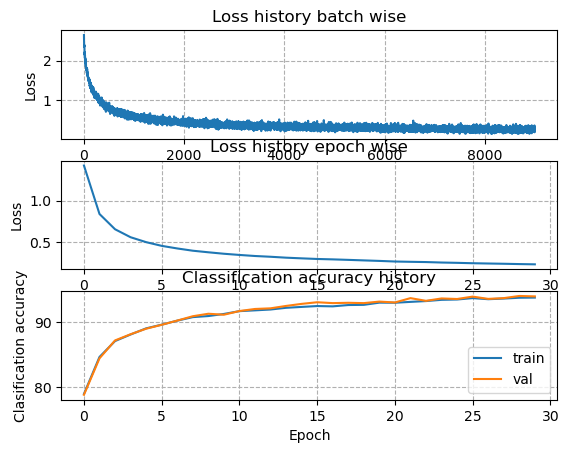

In [ ]:
# Plot the loss function and train / validation accuracies
plt.subplot(3, 1, 1)
plt.plot(stats['loss_history_batch'])
plt.title('Loss history batch wise')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(linestyle='--')

plt.subplot(3, 1, 2)
plt.plot(stats['loss_history_epoch'])
plt.title('Loss history epoch wise')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(linestyle='--')

plt.subplot(3, 1, 3)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.grid(linestyle='--')
plt.legend()
plt.show()

## TODO: Play with different update rule 
# MGD

In [ ]:
#MGD

data_dimension = X_train.shape[1]
num_classes = 10

# Parameters
num_hidden_nodes = 50#best_net.best_params['W1'].shape[1]
learnin_rate = 1e-2# best_net.learning_rate
num_epoch =  30
batch_size = 200
beta_moment = 1e-1
update_rule = 'm_gd'

param_init = 'Xavier'#'small_std'# 'Xavier'#

net = FirstNN(data_dimension, num_hidden_nodes, num_classes, param_init=param_init)

# Train the network
stats = net.train(X_train, Y_train, X_val, Y_val, 
                  num_iters=10000,
                  num_epoch=num_epoch,
                  batch_size=batch_size, 
                  learning_rate=learnin_rate, 
                  beta_moment=beta_moment,
                  update_rule=update_rule,
                  verbose=True
                 )


Xavier
Training epoch 1/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.954723: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 380.80it/s]


epoch: 1 / (30), loss: 1.379234, train acc: 79.16, val acc: 78.83
Training epoch 2/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.671300: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 378.36it/s]


epoch: 2 / (30), loss: 0.824106, train acc: 85.02, val acc: 84.86
Training epoch 3/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.549120: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 371.60it/s]


epoch: 3 / (30), loss: 0.637240, train acc: 87.31, val acc: 87.21
Training epoch 4/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.421195: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 391.55it/s]


epoch: 4 / (30), loss: 0.539898, train acc: 88.41, val acc: 88.86
Training epoch 5/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.482012: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 380.33it/s]


epoch: 5 / (30), loss: 0.479648, train acc: 89.20, val acc: 89.65
Training epoch 6/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.467436: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 380.50it/s]


epoch: 6 / (30), loss: 0.439072, train acc: 89.95, val acc: 90.35
Training epoch 7/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.423676: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 381.88it/s]


epoch: 7 / (30), loss: 0.407422, train acc: 90.43, val acc: 90.60
Training epoch 8/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.351694: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 383.15it/s]


epoch: 8 / (30), loss: 0.381832, train acc: 90.78, val acc: 91.13
Training epoch 9/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.401079: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 385.79it/s]


epoch: 9 / (30), loss: 0.361011, train acc: 91.16, val acc: 91.60
Training epoch 10/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.310096: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 385.78it/s]


epoch: 10 / (30), loss: 0.345009, train acc: 91.40, val acc: 91.53
Training epoch 11/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.401023: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 377.15it/s]


epoch: 11 / (30), loss: 0.330073, train acc: 91.64, val acc: 91.77
Training epoch 12/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.321826: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 371.49it/s]


epoch: 12 / (30), loss: 0.319574, train acc: 92.04, val acc: 92.35
Training epoch 13/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.279539: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 330.81it/s]


epoch: 13 / (30), loss: 0.308808, train acc: 92.19, val acc: 92.37
Training epoch 14/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.312158: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 345.60it/s]


epoch: 14 / (30), loss: 0.299821, train acc: 92.29, val acc: 92.38
Training epoch 15/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.287791: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 363.98it/s]


epoch: 15 / (30), loss: 0.291083, train acc: 92.56, val acc: 92.65
Training epoch 16/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.299048: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 379.49it/s]


epoch: 16 / (30), loss: 0.283372, train acc: 92.71, val acc: 92.77
Training epoch 17/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.260019: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 376.88it/s]


epoch: 17 / (30), loss: 0.280044, train acc: 92.57, val acc: 92.93
Training epoch 18/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.358713: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 386.88it/s]


epoch: 18 / (30), loss: 0.270971, train acc: 92.80, val acc: 92.93
Training epoch 19/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.259581: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 364.19it/s]


epoch: 19 / (30), loss: 0.265546, train acc: 93.09, val acc: 93.32
Training epoch 20/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.238251: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 375.11it/s]


epoch: 20 / (30), loss: 0.259856, train acc: 93.28, val acc: 93.22
Training epoch 21/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.206105: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 343.69it/s]


epoch: 21 / (30), loss: 0.253908, train acc: 93.35, val acc: 93.63
Training epoch 22/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.234122: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 330.89it/s]


epoch: 22 / (30), loss: 0.251283, train acc: 93.31, val acc: 93.63
Training epoch 23/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.224034: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 316.47it/s]


epoch: 23 / (30), loss: 0.245961, train acc: 93.55, val acc: 93.70
Training epoch 24/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.255068: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 308.50it/s]


epoch: 24 / (30), loss: 0.240740, train acc: 93.67, val acc: 93.88
Training epoch 25/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.269092: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 302.58it/s]


epoch: 25 / (30), loss: 0.238979, train acc: 93.77, val acc: 93.62
Training epoch 26/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.271749: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:01<00:00, 288.88it/s]


epoch: 26 / (30), loss: 0.232488, train acc: 93.72, val acc: 94.02
Training epoch 27/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.226965: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:01<00:00, 291.22it/s]


epoch: 27 / (30), loss: 0.230390, train acc: 93.88, val acc: 94.13
Training epoch 28/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.223311: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:01<00:00, 280.20it/s]


epoch: 28 / (30), loss: 0.228088, train acc: 93.94, val acc: 94.17
Training epoch 29/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.167907: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:01<00:00, 297.61it/s]


epoch: 29 / (30), loss: 0.224793, train acc: 94.01, val acc: 94.07
Training epoch 30/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.243914: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 304.32it/s]


epoch: 30 / (30), loss: 0.220810, train acc: 94.24, val acc: 94.20


In [ ]:
# Predict on the train set
Y_train_pred = net.predict(X_train, best_param=True)
train_acc = 100*(Y_train_pred == Y_train).mean()
print('Train accuracy: {:.2f}' .format(train_acc))

# Predict on the validation set
Y_val_pred = net.predict(X_val, best_param=True)
val_acc = 100*(Y_val_pred == Y_val).mean()
print('Validation accuracy: {:.2f}' .format(val_acc))

# Predict on the test set
Y_test_pred = net.predict(X_test, best_param=True)
test_acc = 100*(Y_test_pred == Y_test).mean()
print('Test accuracy: {:.2f}' .format(test_acc))

Train accuracy: 94.24
Validation accuracy: 94.20
Test accuracy: 93.52


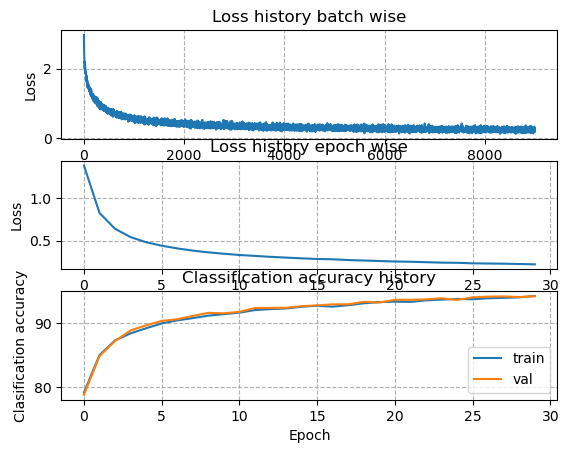

In [ ]:
# Plot the loss function and train / validation accuracies
plt.subplot(3, 1, 1)
plt.plot(stats['loss_history_batch'])
plt.title('Loss history batch wise')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(linestyle='--')

plt.subplot(3, 1, 2)
plt.plot(stats['loss_history_epoch'])
plt.title('Loss history epoch wise')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(linestyle='--')

plt.subplot(3, 1, 3)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.grid(linestyle='--')
plt.legend()
plt.show()